# Cats vs Dogs using Convolutional Neural Neworks

**Dataset: https://www.kaggle.com/c/dogs-vs-cats/data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator

## Separating data in folders

**Those cells should be evaluated only once**

We will not be able to load and rescale all the data at the same time (there is not enough RAM for this). So we will use Keras ImageDataGenerator to help us. To do this, we should first preprocess our images by separting into train and test folders, and cat and dogs folders. 

In [2]:
# Separating dogs and cats

main_path = "/home/marcus/KAGGLE_CATS_and_DOGS/"
files_dogs = []
files_cats = []

for file in os.listdir(main_path):
    if file[:3] == 'dog':
        files_dogs.append(file)
    else:
        files_cats.append(file)

In [3]:
print(f'Number of Dogs: {len(files_dogs)}')
print(f'Number of Cats: {len(files_cats)}')

Number of Dogs: 12500
Number of Cats: 12500


Now, we have to create directories and send data to these directories. We will select 10000 pictures of each animal for our training dataset. The rest is validation data.

In [4]:
dirs_datasets = ['train/', 'test/']
dirs_animals = ['dogs/', 'cats/']

for d in dirs_datasets:
    path = main_path + d
    os.makedirs(path)
    for dd in dirs_animals:
        path = main_path + d + dd
        os.makedirs(path)

In [5]:
dogs_cats = [files_dogs, files_cats]

i = 0
for bla in dogs_cats:
    for file in bla[:10000]:
        new_path = main_path + dirs_datasets[0] + dirs_animals[i] + file
        os.replace(main_path + file, new_path)
    for file in bla[10000:]:
        new_path = main_path + dirs_datasets[1] + dirs_animals[i] + file
        os.replace(main_path + file, new_path)
    i += 1

# Plotting Some Samples

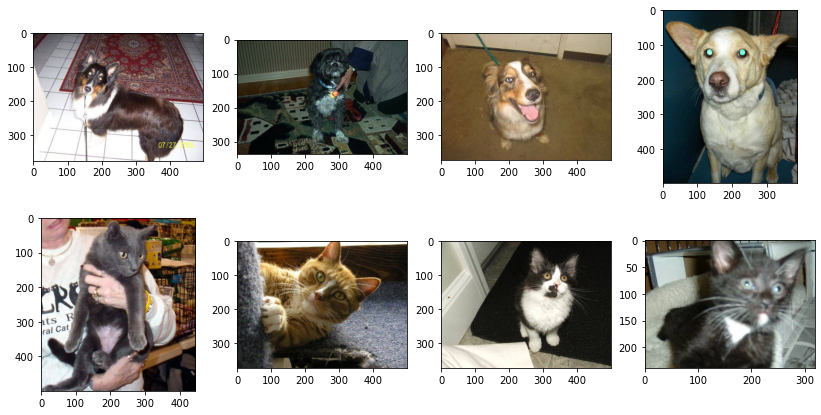

In [3]:
main_path = "/home/marcus/KAGGLE_CATS_and_DOGS/"
num_pics = 4
fig, ax = plt.subplots(nrows=2, ncols=num_pics, figsize=(14,7))

files_dog_aux = os.listdir(main_path+'train/dogs/')[:num_pics]
files_cat_aux = os.listdir(main_path+'train/cats/')[:num_pics]

dogs_plots = [main_path+'train/dogs/'+files_dog_aux[i] for i in range(num_pics)]
cats_plots = [main_path+'train/cats/'+files_cat_aux[i] for i in range(num_pics)]


for i in range(num_pics):
    ax[0][i].imshow(plt.imread(dogs_plots[i]))
for i in range(num_pics):
    ax[1][i].imshow(plt.imread(cats_plots[i]))

# Reading Data

Now we will make use to the **ImageDataGenerator Class.** This class can be used in a variety of situations. It is useful to take a look!

In [4]:
pix = 200
batch_size = 128
main_path = "/home/marcus/KAGGLE_CATS_and_DOGS/"

datagen = ImageDataGenerator(rescale = 1.0 / 255.0) # As usual, we shall rescale our input data


train_data = datagen.flow_from_directory(directory = main_path + 'train/', 
                                        target_size = (pix,pix), # Set images to pix X pix
                                        batch_size = batch_size,
                                        classes = ['dogs', 'cats'],
                                        color_mode = 'rgb',
                                        class_mode = 'categorical')


test_data = datagen.flow_from_directory(directory = main_path + 'test/', 
                                        target_size = (pix,pix), # Set images to pix X pix
                                        batch_size = batch_size,
                                        classes = ['dogs', 'cats'],
                                        color_mode = 'rgb',
                                        class_mode = 'categorical')

# Put classes = ['dogs', 'cats'] will set dogs to 0 and cats to 1

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Model Using Convolutional Neural Networks

In [5]:
model = Sequential(name='Cats_vs_Dogs')

# First Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                input_shape=(pix,pix,3)))
model.add(MaxPooling2D((2,2)))

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Third Convolutional Block
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))


# Flatten the array and go to a Dense Layer with 128 neurons and then to the output layer, with only 2 classes
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))


print('Summary of our model')
model.summary()


# Set optimizers
model.compile(optimizer='adam', metrics=['accuracy'], 
              loss='binary_crossentropy')


# Train our model
history = model.fit(train_data, 
                    epochs=3, batch_size=batch_size, 
                    validation_data = test_data)

# Generate generalization metrics
score = model.evaluate(test_data, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Summary of our model
Model: "Cats_vs_Dogs"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (Non

In [6]:
model.save('cats_vs_dogs.model')

INFO:tensorflow:Assets written to: cats_vs_dogs.model/assets


# Predict

In [ ]:
model = load_model('cats_vs_dogs.model')

In [17]:
def predict_image(file):
    image_org = cv2.imread(file, cv2.IMREAD_COLOR)
    
    image_pred = cv2.resize(image_org, (pix,pix))
    pred = model.predict(image_pred.reshape(-1,pix,pix,3))
    
    fig, ax = plt.subplots(figsize=(10,8))
    ax.imshow(image_org)
    _ = ax.set_title(['This is a Dog!' if np.argmax(pred) == 0 else 'This is a Cat!'][0]+
                  f' (prob = {np.max(pred):.3f})', fontsize=15)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks(ticks=[])
    ax.set_yticks(ticks=[])

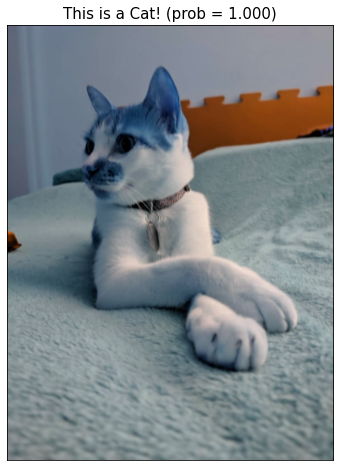

In [18]:
predict_image('ozzy.jpeg')

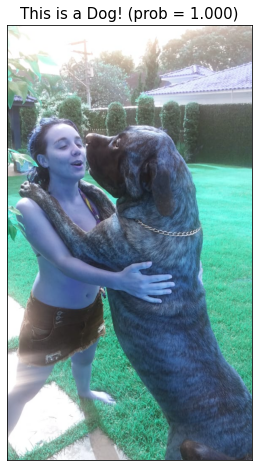

In [19]:
predict_image('Hera.jpeg')

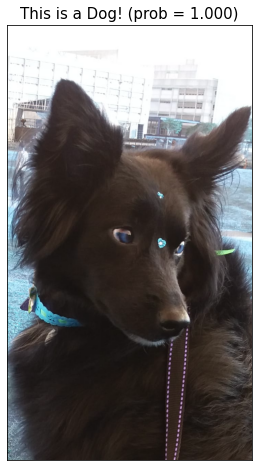

In [31]:
predict_image('Raika.jpeg')

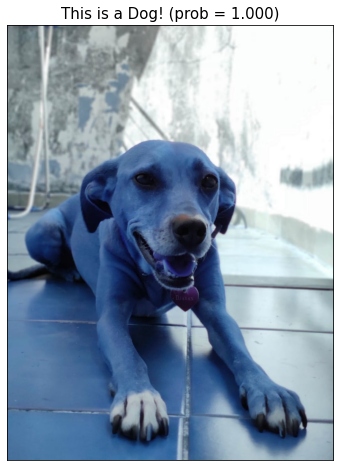

In [21]:
predict_image('djavan.jpeg')

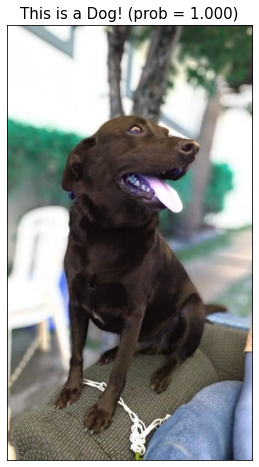

In [22]:
predict_image('jimmy.jpeg')